# Diagnostics

In [74]:
import pandas as pd
import numpy as np

arrests = pd.read_csv(
    "/Users/clarissaache/Documents/Data+/SToPAGetDurhamData/10 Clean Data/!FINAL RAW DATA.csv"
)
arrests.shape


/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (56,61,62,64,65,66,67,68,70,71,72,73,76,78,139,140,142,143,144,145,146,148,149,150,151,152,154,155,156,157,158,160,161,162,163,164,166,167,168,169,170,172,173,174,175,176,178,179,180,181,182,184,185,186,187,188,190,191,192,193,194,196,197,198,199,200,202,203,204,205,206,208,209,210,211,212,214,215,216,217,218,220,221,222,223,224,226,227,228,229,230,232,233,234) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(17158, 242)

In [75]:
by_date = arrests[["dates", "arrestnumber"]].groupby(by="dates", as_index=False).count()
by_date.sample(5)


,dates,arrestnumber
882,2021-08-23,13
389,2020-02-21,10
233,2019-07-23,22
912,2021-09-22,19
873,2021-08-14,15


In [76]:
import datetime as dt

by_date["dates"] = pd.to_datetime(by_date["dates"])
by_date["monthYear"] = by_date["dates"].dt.strftime("%m/%Y")

by_date.sample(3)


,dates,arrestnumber,monthYear
158,2019-05-09,24,05/2019
184,2019-06-04,20,06/2019
26,2018-11-27,14,11/2018


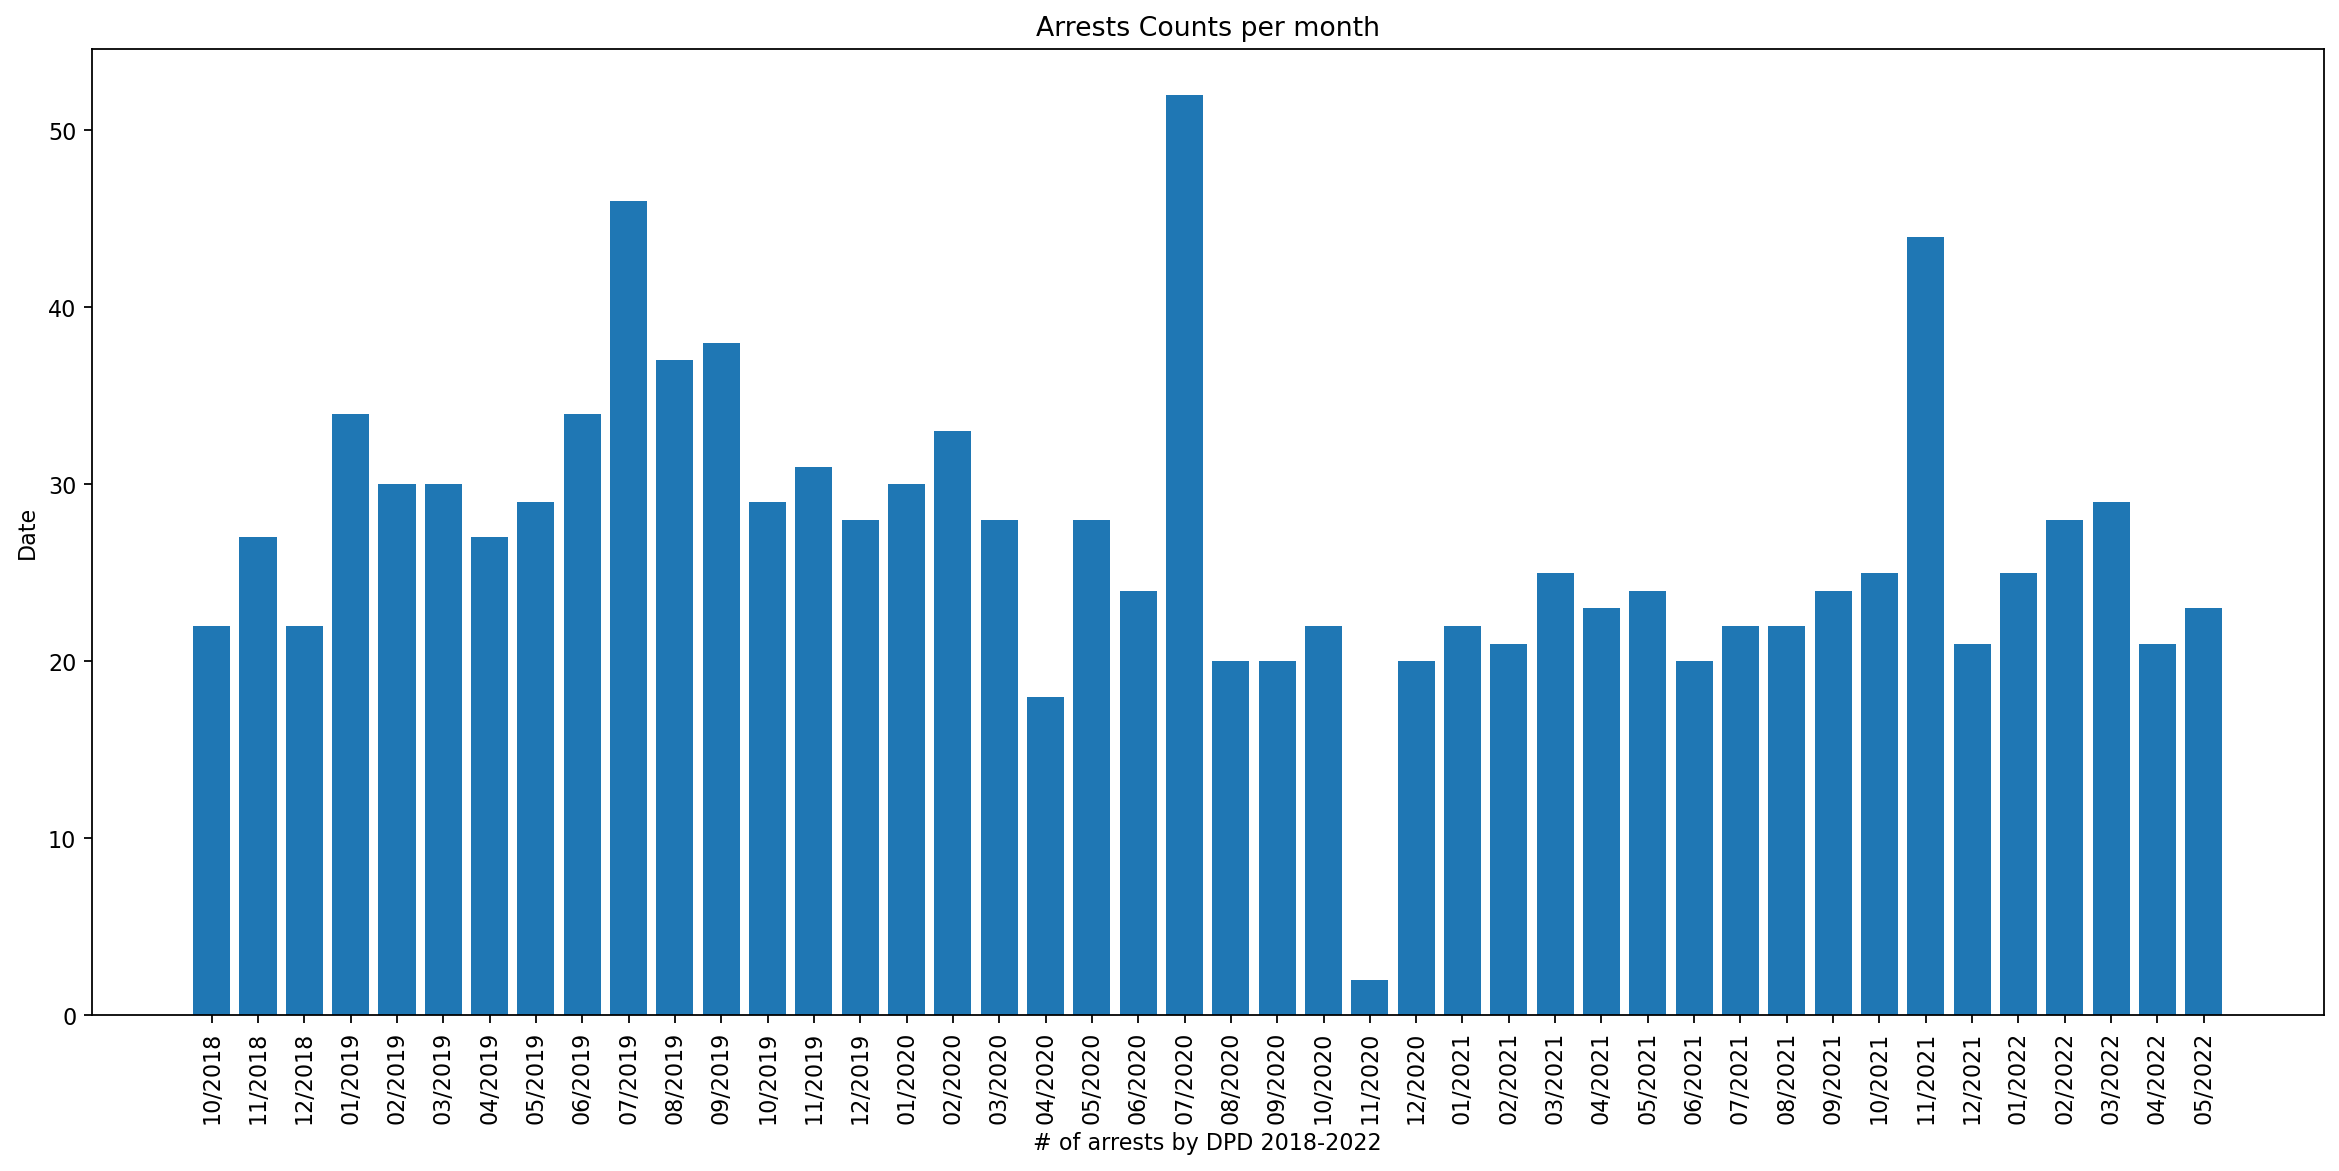

In [77]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt

plt.figure(figsize=(18, 8), dpi=80)
plt.bar(by_date['monthYear'], height=by_date['arrestnumber'])

plt.title("Arrests Counts per month")
plt.xlabel("# of arrests by DPD 2018-2022")
plt.ylabel("Date")
plt.xticks(rotation = 90)
plt.show()

**Looks like we are missing records for October 2020 :(**

In [78]:
Charges = [
    "charge1",
    "charge2",
    "charge3",
    "charge4",
    "charge5",
    "charge6",
    "charge7",
    "charge8",
    "charge9",
    "charge10",
    "charge11",
    "charge12",
    "charge13",
    "charge14",
    "charge15",
    "charge16",
    "charge17",
    "charge18",
    "charge19",
    "charge20",
    "charge21",
    "charge22",
    "charge23",
    "charge24",
    "charge25",
]


In [103]:
arrests["total_count_charges"] = 0


# make a new column with number of arrests
arrests["total_count_charges"] = arrests[Charges].notna().sum(axis=1)

#test
arrests[
    [
        "charge1",
        "charge2",
        "charge3",
        "charge4",
        "charge5",
        "charge6",
        "charge7",
        "charge8",
        "charge9",
        "charge10",
        "total_count_charges",
    ]
].sample(10)


,charge1,charge2,charge3,charge4,charge5,charge6,charge7,charge8,charge9,charge10,total_count_charges
16258,Assault By Strangulation Inflict Physical Injury,Assault On Female,Communicating Threats,Injury To Personal Property,NaN,NaN,NaN,NaN,NaN,NaN,4
10094,Probation Violation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2831,Assault On Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9774,Trespass (second Degree),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13074,Possess Wit M/s/d Control Substance Schedule Iii,Possess Control Substance Schedule Vi,Possession Of Drug Paraphernalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
15873,Littering,Violation Of Emergency Prohibitions AndRestric...,City Ord Not In Table (must Specify Charge InN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
631,Possession Of Drug Paraphernalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12341,Fraudulent Misrepresentation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1233,Shoplifting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7050,Larceny (misdemeanor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [80]:
# to csv
arrests.to_csv('/Users/clarissaache/Documents/Data+/SToPAGetDurhamData/10 Clean Data/!FINAL RAW DATA.csv')

 .



This column can be useful for regression. A cop may applied more severe charges to a person that commits many of them (what do you think?)


 .

# Make the charges the unit of observation

In [81]:
# working on a copy
test = arrests.iloc[:, :]


In [82]:
# we need a page indicator to properly distinguish unique charges in arrest records with more than one page
test["page_num"] = 0

mask = test["arrestnumber"].duplicated(keep=False)
test.loc[mask, "page_num"] = test.loc[mask, "page_num"] + test.groupby(
    "arrestnumber"
).cumcount().add(1)


In [83]:
test[test["arrestnumber"] == 329992][["charge1", "charge2", "charge3", "page_num"]]
# looks right (i tested it out and deleted those cells, dont worry)


,charge1,charge2,charge3,page_num
9500,Larceny (misdemeanor),Forgery Or Possess Counterfeit Instruments,Uttering A Forged Instrument,1.0
9501,Larceny (misdemeanor),Forgery Or Possess Counterfeit Instruments,Uttering A Forged Instrument,2.0
9502,Larceny (misdemeanor),Forgery Or Possess Counterfeit Instruments,Uttering A Forged Instrument,3.0


In [84]:
# now, we need to make charge1, charge2 and charge3 in pages other than the first = nan so they are not over represented

overrepresented_cols = [
    "charge1",
    "charge2",
    "charge3",
    "charge1counts",
    "charge2counts",
    "charge3counts",
    "charge1type",
    "charge2type",
    "charge3type",
    "charge1IBRcode",
    "charge2IBRcode",
    "charge3IBRcode",
    "charge1statutenumber",
    "charge2statutenumber",
    "charge3statutenumber",
    "charge1warrantdate",
    "charge2warrantdate",
    "charge3warrantdate",
]

test[overrepresented_cols]


,charge1,charge2,charge3,charge1counts,charge2counts,charge3counts,charge1type,charge2type,charge3type,charge1IBRcode,charge2IBRcode,charge3IBRcode,charge1statutenumber,charge2statutenumber,charge3statutenumber,charge1warrantdate,charge2warrantdate,charge3warrantdate
0,Assault On Female,NaN,NaN,1.0,NaN,NaN,Misd,NaN,NaN,13B,NaN,NaN,14-33(C2),NaN,NaN,02/03/2021,NaN,NaN
1,Warrant Service For Other Jurisdiction,NaN,NaN,1.0,NaN,NaN,Fel,NaN,NaN,9910,NaN,NaN,WARR,NaN,NaN,07/16/2020,NaN,NaN
2,Larceny Of Firearm,NaN,NaN,1.0,NaN,NaN,Fel,NaN,NaN,23H,NaN,NaN,14-72(B4),NaN,NaN,12/29/2020,NaN,NaN
3,Driving While Impaired,Drive While License Revoked Impaired Rev Based,NaN,1.0,1.0,NaN,Misd,Misd,NaN,90D,9914,NaN,20-138.1,20-28(A1),NaN,04/07/2019,04/07/2019,NaN
4,Driving While Impaired,NaN,NaN,1.0,NaN,NaN,Misd,NaN,NaN,90D,NaN,NaN,20-138.1,NaN,NaN,12/18/2021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17153,Warrant Service For Other Jurisdiction,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9910,NaN,NaN,WARR,NaN,NaN,01/18/2019,NaN,NaN
17154,Larceny (misdemeanor),NaN,NaN,1.0,NaN,NaN,Misd,NaN,NaN,23H,NaN,NaN,14-72(A) M,NaN,NaN,04/18/2022,NaN,NaN
17155,Larceny (misdemeanor),NaN,NaN,1.0,NaN,NaN,Misd,NaN,NaN,23H,NaN,NaN,14-72(A) M,NaN,NaN,04/18/2022,NaN,NaN
17156,Larceny (misdemeanor),NaN,NaN,1.0,NaN,NaN,Misd,NaN,NaN,23H,NaN,NaN,14-72(A) M,NaN,NaN,04/20/2019,NaN,NaN


In [85]:
test[overrepresented_cols] = test[overrepresented_cols].where(test["page_num"] <= 1, np.nan)


test[test["arrestnumber"] == 329992][["charge1", "charge2", "charge3", "page_num"]]
# looks good


,charge1,charge2,charge3,page_num
9500,Larceny (misdemeanor),Forgery Or Possess Counterfeit Instruments,Uttering A Forged Instrument,1.0
9501,NaN,NaN,NaN,2.0
9502,NaN,NaN,NaN,3.0


In [86]:
# make a copy and grab only the column to stack

cols1 = [
    "arrestnumber",
    "page_num",
    "charge1",
    "charge2",
    "charge3",
    "charge4",
    "charge5",
    "charge6",
    "charge7",
    "charge8",
    "charge9",
    "charge10",
    "charge11",
    "charge12",
    "charge13",
    "charge14",
    "charge15",
    "charge16",
    "charge17",
    "charge18",
    "charge19",
    "charge20",
    "charge21",
    "charge22",
    "charge23",
    "charge24",
    "charge25",
]

cols2 = [
    "arrestnumber",
    "page_num",
    "charge1type",
    "charge2type",
    "charge3type",
    "charge4type",
    "charge5type",
    "charge6type",
    "charge7type",
    "charge8type",
    "charge9type",
    "charge10type",
    "charge11type",
    "charge12type",
    "charge13type",
    "charge14type",
    "charge15type",
    "charge16type",
    "charge17type",
    "charge18type",
    "charge19type",
    "charge20type",
    "charge21type",
    "charge22type",
    "charge23type",
    "charge24type",
    "charge25type",
]
cols3 = [
    "arrestnumber",
    "page_num",
    "charge1counts",
    "charge2counts",
    "charge3counts",
    "charge4counts",
    "charge5counts",
    "charge6counts",
    "charge7counts",
    "charge8counts",
    "charge9counts",
    "charge10counts",
    "charge11counts",
    "charge12counts",
    "charge13counts",
    "charge14counts",
    "charge15counts",
    "charge16counts",
    "charge17counts",
    "charge18counts",
    "charge19counts",
    "charge20counts",
    "charge21counts",
    "charge22counts",
    "charge23counts",
    "charge24counts",
    "charge25counts",
]

cols4 = [
    "arrestnumber",
    "page_num",
    "charge1IBRcode",
    "charge2IBRcode",
    "charge3IBRcode",
    "charge4IBRcode",
    "charge5IBRcode",
    "charge6IBRcode",
    "charge7IBRcode",
    "charge8IBRcode",
    "charge9IBRcode",
    "charge10IBRcode",
    "charge11IBRcode",
    "charge12IBRcode",
    "charge13IBRcode",
    "charge14IBRcode",
    "charge15IBRcode",
    "charge16IBRcode",
    "charge17IBRcode",
    "charge18IBRcode",
    "charge19IBRcode",
    "charge20IBRcode",
    "charge21IBRcode",
    "charge22IBRcode",
    "charge23IBRcode",
    "charge24IBRcode",
    "charge25IBRcode",
]
cols5 = [
    "arrestnumber",
    "page_num",
    "charge1statutenumber",
    "charge2statutenumber",
    "charge3statutenumber",
    "charge4statutenumber",
    "charge5statutenumber",
    "charge6statutenumber",
    "charge7statutenumber",
    "charge8statutenumber",
    "charge9statutenumber",
    "charge10statutenumber",
    "charge11statutenumber",
    "charge12statutenumber",
    "charge13statutenumber",
    "charge14statutenumber",
    "charge15statutenumber",
    "charge16statutenumber",
    "charge17statutenumber",
    "charge18statutenumber",
    "charge19statutenumber",
    "charge20statutenumber",
    "charge21statutenumber",
    "charge22statutenumber",
    "charge23statutenumber",
    "charge24statutenumber",
    "charge25statutenumber",
]

cols6 = [
    "arrestnumber",
    "page_num",
    "charge1warrantdate",
    "charge2warrantdate",
    "charge3warrantdate",
    "charge4warrantdate",
    "charge5warrantdate",
    "charge6warrantdate",
    "charge7warrantdate",
    "charge8warrantdate",
    "charge9warrantdate",
    "charge10warrantdate",
    "charge11warrantdate",
    "charge12warrantdate",
    "charge13warrantdate",
    "charge14warrantdate",
    "charge15warrantdate",
    "charge16warrantdate",
    "charge17warrantdate",
    "charge18warrantdate",
    "charge19warrantdate",
    "charge20warrantdate",
    "charge21warrantdate",
    "charge22warrantdate",
    "charge23warrantdate",
    "charge24warrantdate",
    "charge25warrantdate",
]

test1 = test[cols1]
test2 = test[cols2]
test3 = test[cols3]
test4 = test[cols4]
test5 = test[cols5]
test6 = test[cols6]


# Set the primary key as index
test1 = test1.set_index(["arrestnumber", "page_num"])
test2 = test2.set_index(["arrestnumber", "page_num"])
test3 = test3.set_index(["arrestnumber", "page_num"])
test4 = test4.set_index(["arrestnumber", "page_num"])
test5 = test5.set_index(["arrestnumber", "page_num"])
test6 = test6.set_index(["arrestnumber", "page_num"])


In [87]:
# stack
st_test1 = test1.stack(level=0)
st_test2 = test2.stack(level=0)
st_test3 = test3.stack(level=0)
st_test4 = test4.stack(level=0)
st_test5 = test5.stack(level=0)
st_test6 = test6.stack(level=0)

# convert to DF
st_test1 = pd.DataFrame(st_test1)
st_test2 = pd.DataFrame(st_test2)
st_test3 = pd.DataFrame(st_test3)
st_test4 = pd.DataFrame(st_test4)
st_test5 = pd.DataFrame(st_test5)
st_test6 = pd.DataFrame(st_test6)


In [88]:
# reset index
st_test1.reset_index(inplace=True)
st_test2.reset_index(inplace=True)
st_test3.reset_index(inplace=True)
st_test4.reset_index(inplace=True)
st_test5.reset_index(inplace=True)
st_test6.reset_index(inplace=True)


In [89]:
st_test4[st_test4["arrestnumber"] == 329992]


,arrestnumber,page_num,level_2,0
15898,329992,1.0,charge1IBRcode,23H
15899,329992,1.0,charge2IBRcode,250
15900,329992,1.0,charge3IBRcode,250
15901,329992,1.0,charge4IBRcode,26A
15902,329992,1.0,charge5IBRcode,26A
...,...,...,...,...
15962,329992,3.0,charge21IBRcode,250
15963,329992,3.0,charge22IBRcode,250
15964,329992,3.0,charge23IBRcode,250
15965,329992,3.0,charge24IBRcode,26A


In [90]:
# Rename and get rid of extra columns
st_test1["charges"] = st_test1[0]
st_test = st_test1[["arrestnumber", "page_num", "level_2", "charges"]]

st_test2["charge_type"] = st_test2[0]
st_test2 = st_test2[["arrestnumber", "page_num", "level_2", "charge_type"]]

st_test3["charge_counts"] = st_test3[0]
st_test3 = st_test3[["arrestnumber", "page_num", "level_2", "charge_counts"]]

st_test4["charge_IBRcode"] = st_test4[0]
st_test4 = st_test4[["arrestnumber", "page_num", "level_2", "charge_IBRcode"]]

st_test5["charge_statutenumber"] = st_test5[0]
st_test5 = st_test5[["arrestnumber", "page_num", "level_2", "charge_statutenumber"]]

st_test6["charge_warrantdate"] = st_test6[0]
st_test6 = st_test6[["arrestnumber", "page_num", "level_2", "charge_warrantdate"]]


In [91]:
st_test5.loc[1, "page_num"]


0.0

In [92]:
# get carge number
import re


def strip_AZ(df):
    for i in range(len(df["level_2"])):
        df.loc[i, "level_2"] = re.sub("[A-Za-z ,!]", "", df.loc[i, "level_2"])


In [93]:
strip_AZ(st_test1)
strip_AZ(st_test2)
strip_AZ(st_test3)
strip_AZ(st_test4)
strip_AZ(st_test5)
strip_AZ(st_test6)

#this one takes 2 min to run

In [94]:
st_test1[st_test1["arrestnumber"] == 329992]


,arrestnumber,page_num,level_2,0,charges
15898,329992,1.0,1,Larceny (misdemeanor),Larceny (misdemeanor)
15899,329992,1.0,2,Forgery Or Possess Counterfeit Instruments,Forgery Or Possess Counterfeit Instruments
15900,329992,1.0,3,Uttering A Forged Instrument,Uttering A Forged Instrument
15901,329992,1.0,4,Exploit Disable Elder Trust,Exploit Disable Elder Trust
15902,329992,1.0,5,Obtaining Property By False Pretenses,Obtaining Property By False Pretenses
...,...,...,...,...,...
15962,329992,3.0,21,Uttering A Forged Instrument,Uttering A Forged Instrument
15963,329992,3.0,22,Forgery Or Possess CounterfeitInstruments,Forgery Or Possess CounterfeitInstruments
15964,329992,3.0,23,Uttering A Forged Instrument,Uttering A Forged Instrument
15965,329992,3.0,24,Obtaining Property By False Pretenses,Obtaining Property By False Pretenses


In [95]:
# get rid of extra columns
test = test.loc[
    :,
    ~test.columns.isin(
        [
            "charge1",
            "charge2",
            "charge3",
            "charge4",
            "charge5",
            "charge6",
            "charge7",
            "charge8",
            "charge9",
            "charge10",
            "charge11",
            "charge12",
            "charge13",
            "charge14",
            "charge15",
            "charge16",
            "charge17",
            "charge18",
            "charge19",
            "charge20",
            "charge21",
            "charge22",
            "charge23",
            "charge24",
            "charge25",
            "charge1type",
            "charge2type",
            "charge3type",
            "charge4type",
            "charge5type",
            "charge6type",
            "charge7type",
            "charge8type",
            "charge9type",
            "charge10type",
            "charge11type",
            "charge12type",
            "charge13type",
            "charge14type",
            "charge15type",
            "charge16type",
            "charge17type",
            "charge18type",
            "charge19type",
            "charge20type",
            "charge21type",
            "charge22type",
            "charge23type",
            "charge24type",
            "charge25type",
            "charge1counts",
            "charge2counts",
            "charge3counts",
            "charge4counts",
            "charge5counts",
            "charge6counts",
            "charge7counts",
            "charge8counts",
            "charge9counts",
            "charge10counts",
            "charge11counts",
            "charge12counts",
            "charge13counts",
            "charge14counts",
            "charge15counts",
            "charge16counts",
            "charge17counts",
            "charge18counts",
            "charge19counts",
            "charge20counts",
            "charge21counts",
            "charge22counts",
            "charge23counts",
            "charge24counts",
            "charge25counts",
            "charge1IBRcode",
            "charge2IBRcode",
            "charge3IBRcode",
            "charge4IBRcode",
            "charge5IBRcode",
            "charge6IBRcode",
            "charge7IBRcode",
            "charge8IBRcode",
            "charge9IBRcode",
            "charge10IBRcode",
            "charge11IBRcode",
            "charge12IBRcode",
            "charge13IBRcode",
            "charge14IBRcode",
            "charge15IBRcode",
            "charge16IBRcode",
            "charge17IBRcode",
            "charge18IBRcode",
            "charge19IBRcode",
            "charge20IBRcode",
            "charge21IBRcode",
            "charge22IBRcode",
            "charge23IBRcode",
            "charge24IBRcode",
            "charge25IBRcode",
            "charge1statutenumber",
            "charge2statutenumber",
            "charge3statutenumber",
            "charge4statutenumber",
            "charge5statutenumber",
            "charge6statutenumber",
            "charge7statutenumber",
            "charge8statutenumber",
            "charge9statutenumber",
            "charge10statutenumber",
            "charge11statutenumber",
            "charge12statutenumber",
            "charge13statutenumber",
            "charge14statutenumber",
            "charge15statutenumber",
            "charge16statutenumber",
            "charge17statutenumber",
            "charge18statutenumber",
            "charge19statutenumber",
            "charge20statutenumber",
            "charge21statutenumber",
            "charge22statutenumber",
            "charge23statutenumber",
            "charge24statutenumber",
            "charge25statutenumber",
            "charge1warrantdate",
            "charge2warrantdate",
            "charge3warrantdate",
            "charge4warrantdate",
            "charge5warrantdate",
            "charge6warrantdate",
            "charge7warrantdate",
            "charge8warrantdate",
            "charge9warrantdate",
            "charge10warrantdate",
            "charge11warrantdate",
            "charge12warrantdate",
            "charge13warrantdate",
            "charge14warrantdate",
            "charge15warrantdate",
            "charge16warrantdate",
            "charge17warrantdate",
            "charge18warrantdate",
            "charge19warrantdate",
            "charge20warrantdate",
            "charge21warrantdate",
            "charge22warrantdate",
            "charge23warrantdate",
            "charge24warrantdate",
            "charge25warrantdate",
        ]
    ),
]


In [96]:
st_test2[st_test2["arrestnumber"] == 329992]


,arrestnumber,page_num,level_2,charge_type
15433,329992,1.0,1,Misd
15434,329992,1.0,2,Fel
15435,329992,1.0,3,Fel
15436,329992,1.0,4,Fel
15437,329992,1.0,5,Fel
...,...,...,...,...
15497,329992,3.0,21,Fel
15498,329992,3.0,22,Fel
15499,329992,3.0,23,Fel
15500,329992,3.0,24,Fel


In [97]:
# merge to relational df
df = st_test1.merge(st_test2, on=["arrestnumber", "level_2", "page_num"])
print(df.shape)
df = df.merge(st_test3, on=["arrestnumber", "level_2", "page_num"])
print(df.shape)
df = df.merge(st_test4, on=["arrestnumber", "level_2", "page_num"])
print(df.shape)
df = df.merge(st_test5, on=["arrestnumber", "level_2", "page_num"])
print(df.shape)
df = df.merge(st_test6, on=["arrestnumber", "level_2", "page_num"])
print(df.shape)
df["chargenum"] = df["level_2"]
df.sample(5)


(28178, 6)
(28178, 7)
(28178, 8)
(28178, 9)
(26548, 10)


,arrestnumber,page_num,level_2,0,charges,charge_type,charge_counts,charge_IBRcode,charge_statutenumber,charge_warrantdate,chargenum
19816,326543,0.0,1,Possession Of Firearms Etc By Felon Prohibited,Possession Of Firearms Etc By Felon Prohibited,Fel,1.0,520,14-415.1,10/09/2021,1
4358,327162,0.0,4,Possession Of Open Containers Of CertainAlcoho...,Possession Of Open Containers Of CertainAlcoho...,Misd,1.0,90Z,CO 46-149,11/24/2021,4
4953,320149,0.0,2,Indecent Exposure,Indecent Exposure,Misd,1.0,90C,14-190.9,09/30/2020,2
12775,326988,0.0,2,Warrant Service For Other Jurisdiction,Warrant Service For Other Jurisdiction,Misd,1.0,9910,WARR,01/14/2021,2
997,318217,0.0,1,Possession Of Drug Paraphernalia,Possession Of Drug Paraphernalia,Misd,1.0,35B,90-113.22,05/12/2020,1


In [98]:
df = df.loc[
    :,
    ~df.columns.isin([0, "level_2"]),
]

df.sort_values("charges")


,arrestnumber,page_num,charges,charge_type,charge_counts,charge_IBRcode,charge_statutenumber,charge_warrantdate,chargenum
5972,307586,0.0,Abandonment (child),Misd,1.0,90F,14-322(D),11/08/2018,1
20095,322547,0.0,Abandonment (child),Misd,1.0,90F,14-322(D),03/19/2021,1
1824,317115,0.0,Abandonment (child),Misd,1.0,90F,14-322(D),01/27/2020,1
14982,330365,0.0,Abandonment Of Animals,Misd,2.0,90Z,14-361.1,05/03/2022,1
7744,309805,0.0,Abduction Of Children,Fel,1.0,100,14-41,02/01/2019,1
...,...,...,...,...,...,...,...,...,...
6328,329857,0.0,Worthless Check,Misd,1.0,90A,14-107,03/15/2022,1
10267,311623,0.0,Worthless Check,Fel,1.0,90A,14-107,07/26/2015,1
3476,320343,0.0,Wrongfully Obtain/divulging Telephonic Messages,Misd,1.0,90Z,14-370,10/12/2020,1
20490,322526,0.0,Wrongfully Obtain/divulging Telephonic Messages,Misd,1.0,90Z,14-370,03/15/2021,3


In [99]:
# lets look at my favorite edge case

df[df["arrestnumber"] == 329992]  # lol

# this is crazy, this person actually had 69 charges

# df.drop_duplicates(subset=['arrestnumber', 'charges','charge_type'], keep='first', inplace=True, ignore_index=True)
# CANT DROP THEM BECAUSE THEY ARE NOT DUPS!


,arrestnumber,page_num,charges,charge_type,charge_counts,charge_IBRcode,charge_statutenumber,charge_warrantdate,chargenum
14525,329992,1.0,Larceny (misdemeanor),Misd,1.0,23H,14-72(A) M,06/01/2020,1
14526,329992,1.0,Forgery Or Possess Counterfeit Instruments,Fel,1.0,250,14-119(A),06/01/2020,2
14527,329992,1.0,Uttering A Forged Instrument,Fel,1.0,250,14-120,06/01/2020,3
14528,329992,1.0,Exploit Disable Elder Trust,Fel,1.0,26A,14-112.2(B),06/01/2020,4
14529,329992,1.0,Obtaining Property By False Pretenses,Fel,1.0,26A,14-100,06/01/2020,5
...,...,...,...,...,...,...,...,...,...
14589,329992,3.0,Uttering A Forged Instrument,Fel,1.0,250,14-120,06/01/2020,21
14590,329992,3.0,Forgery Or Possess CounterfeitInstruments,Fel,1.0,250,14-119(A),06/01/2020,22
14591,329992,3.0,Uttering A Forged Instrument,Fel,1.0,250,14-120,06/01/2020,23
14592,329992,3.0,Obtaining Property By False Pretenses,Fel,1.0,26A,14-100,06/01/2020,24


In [100]:
# Im going to try to count get the right count
new_df = df.groupby(
    by=[
        "arrestnumber",
        "charges",
        "charge_type",
        "charge_IBRcode",
        "charge_statutenumber",
        "charge_warrantdate",
    ],
    as_index=False,
).sum()
new_df[new_df["arrestnumber"] == 312853]


,arrestnumber,charges,charge_type,charge_IBRcode,charge_statutenumber,charge_warrantdate,page_num,charge_counts
6022,312853,Larceny (misdemeanor),Misd,23H,14-72(A) M,07/30/2019,0.0,2.0


In [101]:
new_df[new_df["arrestnumber"] == 329992]['charge_counts'].sum() #69, perfect!!
# looks good

69.0

### Why is the data skewed?
So, sometimes, when someone is charged of multiple crimes, cops will enter the same charge in multiple lines instead of using the VERY USEFULL field called "charge counts".

If you dont understand what I am saying, go to https://durhampdnc.policetocitizen.com/eventsearch and find **CASE NUMBER = 20016704**

You will see multiple lines of the SAME charge with counts = 1
Its a data entry mistake we simply cannot avoid *(or maybe I dont understand how the form must be filled out)*.


**ok, scratch that. Now its fine, charge counts are correct regardless of whether the cop recorded them "right"**
**Also, because the first 3 charges apear in repeated in second pages I deleted them from pages larges than the first... this time data should not be skewed**



In [102]:
df.to_csv(
    "/Users/clarissaache/Documents/Data+/SToPAGetDurhamData/10 Clean Data/CHARGES.csv"
)
